In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import tensorflow as tf
import tensorflow.keras
import sklearn as sk

In [20]:
import platform
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
#print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-14.1.2-arm64-arm-64bit
Tensor Flow Version: 2.15.0

Python 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:35:25) [Clang 16.0.6 ]
Pandas 2.2.0
Scikit-Learn 1.4.0
GPU is available


In [181]:
df_train = pd.read_csv('/Users/indrilaganguly/Documents/Riku/Computer_poster/archive/sign_mnist_train.csv')
#print(df_train.head()) 
#df_train.info()

In [182]:
df_test = pd.read_csv('/Users/indrilaganguly/Documents/Riku/Computer_poster/archive/sign_mnist_test.csv')
#print(df_test.head()) 
#df_test.info()

In [183]:
y_train = df_train[["label"]]
y_train=y_train.to_numpy()

In [184]:
X_train = df_train.loc[:, df_train.columns != 'label']
X_train = X_train.to_numpy()

In [185]:
y_test = df_test[["label"]]
y_test=y_test.to_numpy()
X_test = df_test.loc[:,df_test.columns!='label']
X_test = X_test.to_numpy()

In [186]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=25, dtype='float32'
)

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=25, dtype='float32'
)

27455
27455
7172
7172


In [187]:
y_train_categorical[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [94]:
#X_train[0].reshape(28,28)

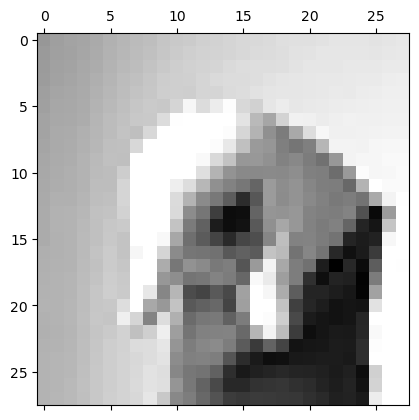

In [276]:
plt.matshow(X_train[5].reshape(28,28), cmap='gray')
plt.savefig('plot_train6.png', dpi=300, bbox_inches='tight')

In [188]:
X_train.shape
X_train=X_train/255
X_test=X_test/255

In [97]:
#model = keras.Sequential([
#    keras.layers.Dense(26,input_shape=(784,),activation='sigmoid')
#])
#model.compile(
#    optimizer='adam',
#    loss='sparse_categorical_crossentropy',
#    metrics=['accuracy']
#)
#model.fit(X_train,y_train,epochs=20)

In [98]:
#model.evaluate(X_test,y_test)

In [99]:
#y_predict = model.predict(X_test)
#y_predict[0]

In [100]:
#np.argmax(y_predict[0])

In [101]:
#plt.matshow(X_test[0].reshape(28,28))

In [102]:
#y_predict[1]

In [103]:
#np.argmax(y_predict[1])

In [104]:
#plt.matshow(X_test[1].reshape(28,28))

In [105]:
#y_predicted_labels = [np.argmax(i) for i in y_predict]
#y_predicted_labels[0:20]

In [106]:
#y_test[0:20]

In [107]:
#cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [189]:
import seaborn as sb
#plt.figure(figsize=(15,10))
#sb.heatmap(cm,annot=True,fmt='d')
#plt.xlabel('Predicted')
#plt.ylabel('Truth')

In [372]:
model = keras.Sequential([
    keras.layers.Dense(350,input_shape=(784,),activation='relu'),
    #keras.layers.Dropout(0.2),
    #keras.layers.Dense(180,activation='relu'),
    #keras.layers.Dropout(0.1),
    keras.layers.Dense(25,activation='softmax')
])
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train_categorical,epochs=35)

Epoch 1/35
858/858 [==============================] - 13s 15ms/step - loss: 2.5678 - accuracy: 0.2829
Epoch 2/35
858/858 [==============================] - 12s 14ms/step - loss: 1.7502 - accuracy: 0.5394
Epoch 3/35
858/858 [==============================] - 13s 15ms/step - loss: 1.3777 - accuracy: 0.6328
Epoch 4/35
858/858 [==============================] - 12s 14ms/step - loss: 1.1586 - accuracy: 0.6875
Epoch 5/35
858/858 [==============================] - 12s 14ms/step - loss: 1.0067 - accuracy: 0.7302
Epoch 6/35
858/858 [==============================] - 13s 15ms/step - loss: 0.8975 - accuracy: 0.7569
Epoch 7/35
858/858 [==============================] - 14s 16ms/step - loss: 0.8096 - accuracy: 0.7853
Epoch 8/35
858/858 [==============================] - 13s 15ms/step - loss: 0.7384 - accuracy: 0.8066
Epoch 9/35
858/858 [==============================] - 12s 14ms/step - loss: 0.6791 - accuracy: 0.8208
Epoch 10/35
858/858 [==============================] - 12s 14ms/step - loss: 0.627

In [347]:
epoch_list =  list(range(1,36))
accuracy_list_ann = [0.395, 0.638, 0.729, 0.775, 0.815, 0.836, 0.863, 0.885, 0.897, 0.916, 0.924, 0.932, 0.944, 0.949, 0.948, 
                 0.957, 0.964, 0.961, 0.968, 0.968, 0.976, 0.967, 0.968, 0.968, 0.975, 0.980, 0.970, 0.976, 0.984, 0.973, 0.982,0.976, 
                 0.986, 0.968, 0.984]
accuracy_list_ann_sgd = [0.298, 0.534, 0.627, 0.682, 0.725, 0.756, 0.780, 0.802, 0.821, 0.836, 0.850, 0.865, 0.874, 0.886, 0.895, 0.903,
                         0.911, 0.919, 0.925, 0.933, 0.936, 0.943, 0.949, 0.953, 0.959, 0.962, 0.967, 0.970, 0.975, 0.976, 0.978, 0.980, 
                         0.983, 0.983, 0.988]

In [ ]:
%%timeit -n1 -r1

In [34]:
X_test.shape

(7172, 784)

In [373]:
model.evaluate(X_test,y_test_categorical)

225/225 [==============================] - 3s 14ms/step - loss: 1.0922 - accuracy: 0.7041


[1.0922471284866333, 0.7041271328926086]

In [374]:
y_predict = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predict]

225/225 [==============================] - 0s 2ms/step


Text(158.22222222222223, 0.5, 'Truth')

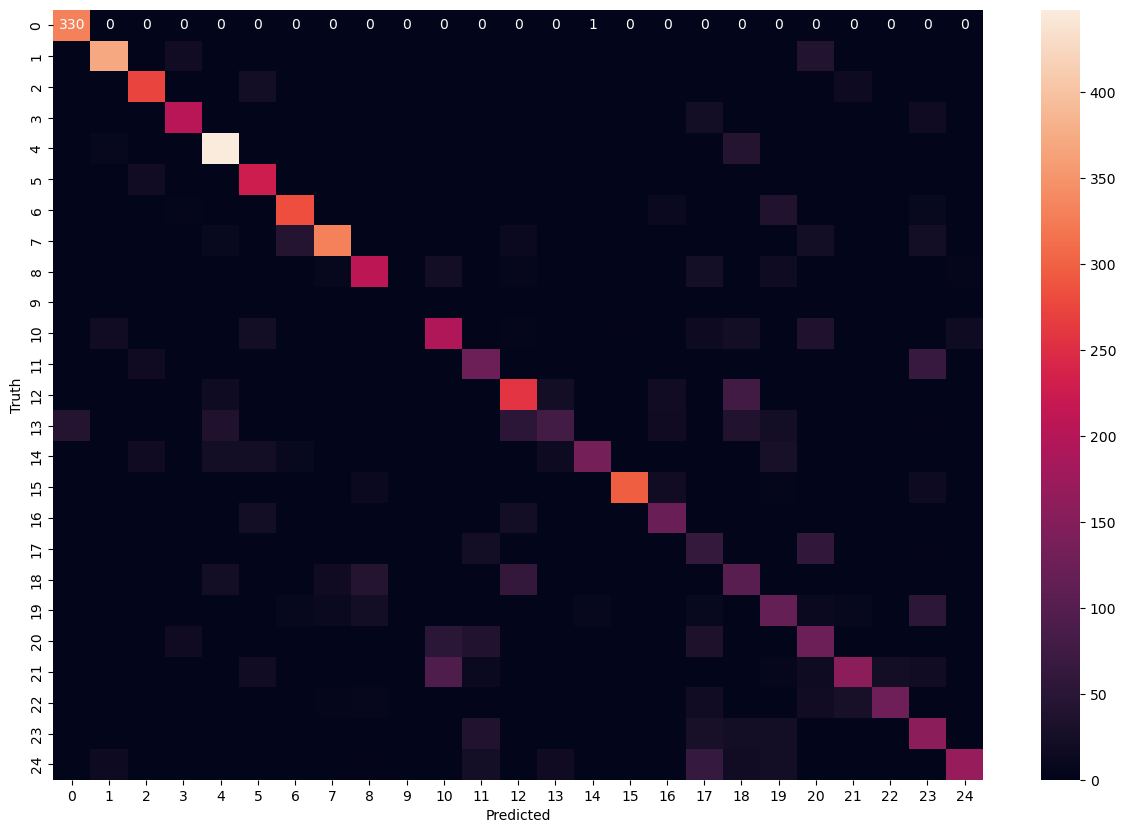

In [223]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(15,10))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


C
K
K


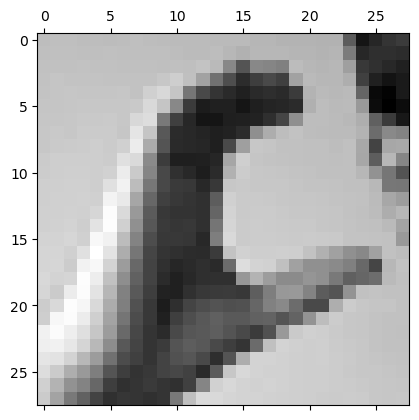

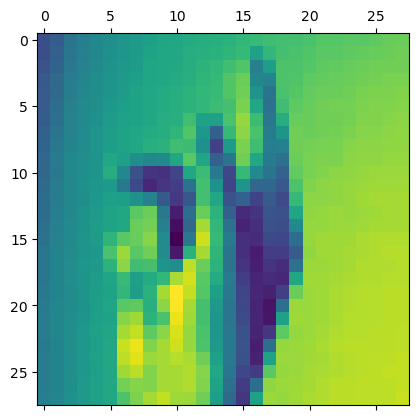

In [264]:
letters = ["A","B","C", "D", "E", "F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]
print(letters[y_train[2][0]])
plt.matshow(X_train[2].reshape(28,28), cmap='gray')

print(letters[y_test[6][0]])
plt.matshow(X_test[6].reshape(28,28), cmap='gray')
print(letters[y_predicted_labels[6]])

V
F


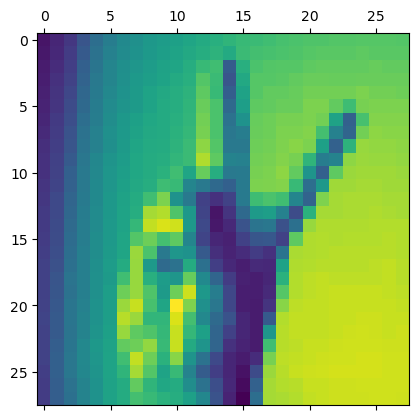

In [167]:
 #y_predicted_labels
#model.predict(X_test).shape
#y_predicted_labels
#np.where(y_predict[0]==1)
#[np.where(r==1)[0][0] for r in y_predict[0]]
misclassified = np.where(y_test.reshape(7172) != y_predicted_labels)
mis = misclassified[0][0]
print(letters[y_test[mis][0]])
plt.matshow(X_test[mis].reshape(28,28))
print(letters[y_predicted_labels[mis]])

In [375]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       331
           1       1.00      0.86      0.93       432
           2       0.94      0.88      0.91       310
           3       0.89      0.80      0.84       245
           4       0.87      0.90      0.88       498
           5       0.68      0.91      0.78       247
           6       0.84      0.71      0.77       348
           7       0.79      0.76      0.78       436
           8       0.66      0.71      0.68       288
          10       0.57      0.44      0.50       331
          11       0.61      0.90      0.73       209
          12       0.71      0.56      0.63       394
          13       0.68      0.57      0.62       291
          14       0.92      0.61      0.73       246
          15       0.93      0.99      0.96       347
          16       0.62      0.74      0.67       164
          17       0.26      0.30      0.28       144
          18       0.25    

In [281]:
X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)

In [388]:
model_cnn = keras.Sequential([
    
    keras.layers.Conv2D(filters=32,padding='same', kernel_size=(3,3),  activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=32,padding='same', kernel_size=(3,3),  activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters=32,padding='same', kernel_size=(3,3),  activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(50,activation='relu'),
    #keras.layers.Dropout(0.5), 
    keras.layers.Dense(25,activation='softmax')
])
model_cnn.compile( 
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_cnn.fit(X_train_cnn,y_train_categorical,epochs=7)

Epoch 1/7
858/858 [==============================] - 20s 22ms/step - loss: 3.1903 - accuracy: 0.0488
Epoch 2/7
858/858 [==============================] - 18s 21ms/step - loss: 2.9935 - accuracy: 0.1148
Epoch 3/7
858/858 [==============================] - 18s 21ms/step - loss: 2.2176 - accuracy: 0.3120
Epoch 4/7
858/858 [==============================] - 18s 21ms/step - loss: 1.4377 - accuracy: 0.5293
Epoch 5/7
858/858 [==============================] - 18s 22ms/step - loss: 0.9694 - accuracy: 0.6780
Epoch 6/7
858/858 [==============================] - 19s 22ms/step - loss: 0.6927 - accuracy: 0.7668
Epoch 7/7
858/858 [==============================] - 18s 21ms/step - loss: 0.5402 - accuracy: 0.8131


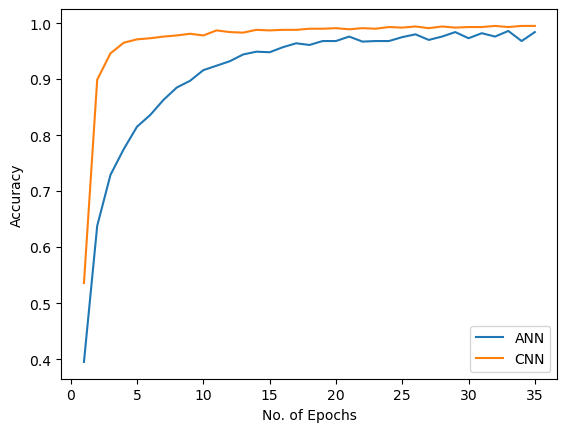

In [353]:
accuracy_list_cnn = [0.536, 0.899, 0.946, 0.965, 0.971, 0.973, 0.976, 0.978, 0.981, 0.978, 0.987, 0.984, 0.983,
                     0.988, 0.987, 0.988, 0.988, 0.990, 0.990, 0.991, 0.989, 0.991, 0.990, 0.993, 0.992, 0.994,
                     0.991, 0.994, 0.992, 0.993, 0.993, 0.995, 0.993, 0.995, 0.995]

accuracy_list_cnn_sgd = [0.052, 0.097, 0.326, 0.598, 0.744, 0.828, 0.875, 0.903, 0.925, 0.931, 0.943, 0.943, 0.944, 0.930, 0.917, 0.891, 0.831,
                        0.743, 0.4558, 0.363, 0.581, 0.255, 0.049, 0.057, 0.073, 0.182, 0.212, 0.420, 0.290, 0.214, 0.188, 0.070, 0.079,
                        0.1514, 0.0798]

plt.plot(epoch_list, accuracy_list_ann, label='ANN')
plt.plot(epoch_list, accuracy_list_cnn, label='CNN')

plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.savefig('plot_cnn_vs_ann_adam.png', dpi=300, bbox_inches='tight')



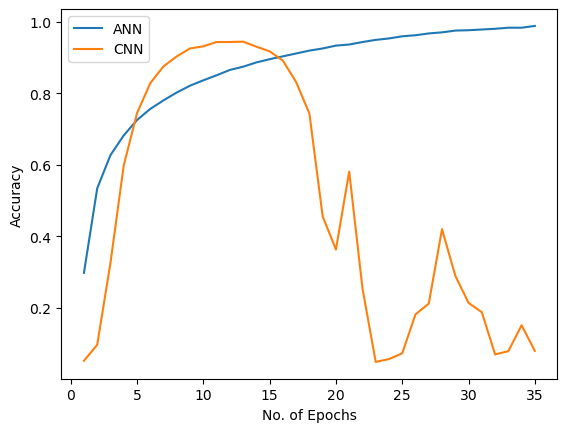

In [354]:
plt.plot(epoch_list, accuracy_list_ann_sgd, label='ANN')
plt.plot(epoch_list, accuracy_list_cnn_sgd, label='CNN')

plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.savefig('plot_cnn_vs_ann_sgd.png', dpi=300, bbox_inches='tight')

In [389]:
model_cnn.evaluate(X_test_cnn,y_test_categorical)

225/225 [==============================] - 4s 18ms/step - loss: 0.6492 - accuracy: 0.7819


[0.6492002606391907, 0.7819297313690186]

In [382]:
y_predict_cnn = model_cnn.predict(X_test_cnn)
y_predicted_labels_cnn = [np.argmax(i) for i in y_predict_cnn]

225/225 [==============================] - 1s 3ms/step


In [383]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predicted_labels_cnn))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       331
           1       0.96      1.00      0.98       432
           2       0.98      0.98      0.98       310
           3       1.00      0.87      0.93       245
           4       0.92      0.96      0.94       498
           5       1.00      1.00      1.00       247
           6       0.94      0.92      0.93       348
           7       0.89      0.91      0.90       436
           8       0.99      1.00      0.99       288
          10       1.00      0.92      0.96       331
          11       1.00      1.00      1.00       209
          12       0.64      0.94      0.76       394
          13       1.00      0.33      0.49       291
          14       0.99      0.87      0.93       246
          15       0.99      1.00      1.00       347
          16       0.91      0.87      0.89       164
          17       0.90      0.85      0.87       144
          18       0.96    

V
V


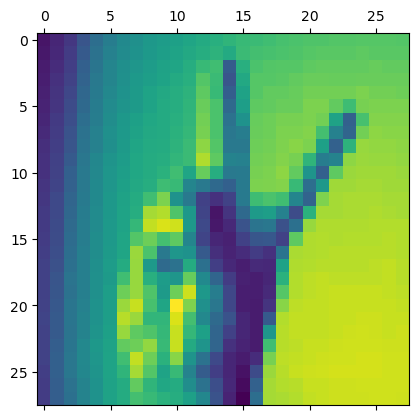

In [256]:
misclassified_cnn = np.where(y_test.reshape(7172) != y_predicted_labels_cnn)
mis_cnn = misclassified_cnn[0][0]
print(letters[y_test[mis][0]])
plt.matshow(X_test[mis].reshape(28,28))
print(letters[y_predicted_labels_cnn[mis]])

S
S
N


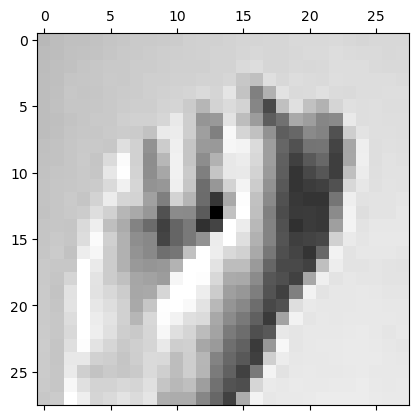

In [307]:
misclassified_ann_only = np.where((y_test.reshape(7172) != y_predicted_labels)&(y_test.reshape(7172) == y_predicted_labels_cnn))
misclassified_ann_only
mis_ann_only = misclassified_ann_only[0][5]
print(letters[y_test[mis_ann_only][0]])
plt.matshow(X_test[mis_ann_only].reshape(28,28), cmap='gray')
plt.savefig('plot_ann6.png', dpi=300, bbox_inches='tight')
print(letters[y_predicted_labels_cnn[mis_ann_only]])
print(letters[y_predicted_labels[mis_ann_only]])

P
Q
P


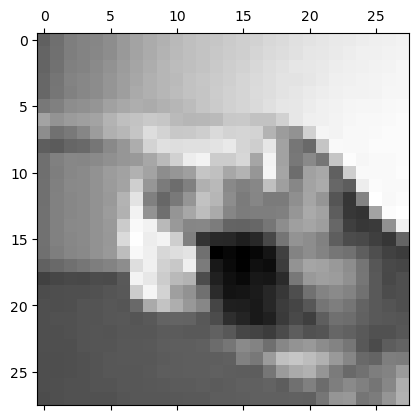

In [315]:
misclassified_cnn_only = np.where((y_test.reshape(7172) != y_predicted_labels_cnn)&(y_test.reshape(7172) == y_predicted_labels))
misclassified_cnn_only
mis_cnn_only = misclassified_cnn_only[0][7]
print(letters[y_test[mis_cnn_only][0]])
plt.matshow(X_test[mis_cnn_only].reshape(28,28), cmap='gray')
plt.savefig('plot_cnn4.png', dpi=300, bbox_inches='tight')
print(letters[y_predicted_labels_cnn[mis_cnn_only]])
print(letters[y_predicted_labels[mis_cnn_only]])

R
V
V


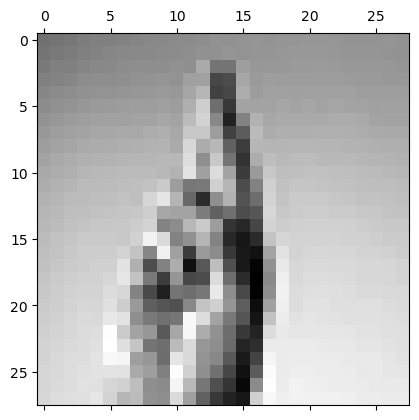

In [340]:
misclassified_both = np.where((y_test.reshape(7172) != y_predicted_labels_cnn)&(y_test.reshape(7172) != y_predicted_labels))
misclassified_both
mis_both = misclassified_both[0][10]
print(letters[y_test[mis_both][0]])
plt.matshow(X_test[mis_both].reshape(28,28), cmap='gray')
plt.savefig('plot_both9.png', dpi=300, bbox_inches='tight')
print(letters[y_predicted_labels_cnn[mis_both]])
print(letters[y_predicted_labels[mis_both]])

In [35]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(26,activation='sigmoid')
])

tf_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=20, callbacks=[tf_callback])

Epoch 1/20
858/858 [==============================] - 8s 8ms/step - loss: 2.1570 - accuracy: 0.3346
Epoch 2/20
858/858 [==============================] - 7s 8ms/step - loss: 1.2645 - accuracy: 0.5994
Epoch 3/20
858/858 [==============================] - 7s 8ms/step - loss: 0.8947 - accuracy: 0.7105
Epoch 4/20
858/858 [==============================] - 5s 5ms/step - loss: 0.6640 - accuracy: 0.7879
Epoch 5/20
858/858 [==============================] - 5s 6ms/step - loss: 0.5108 - accuracy: 0.8372
Epoch 6/20
858/858 [==============================] - 5s 6ms/step - loss: 0.3899 - accuracy: 0.8776
Epoch 7/20
858/858 [==============================] - 5s 6ms/step - loss: 0.2906 - accuracy: 0.9123
Epoch 8/20
858/858 [==============================] - 7s 8ms/step - loss: 0.2271 - accuracy: 0.9322
Epoch 9/20
858/858 [==============================] - 7s 8ms/step - loss: 0.1655 - accuracy: 0.9549
Epoch 10/20
858/858 [==============================] - 7s 8ms/step - loss: 0.1328 - accuracy: 0.9658

In [37]:
%load_ext tensorboard
%tensorboard --logdir logs/train

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
